In [36]:
import numpy as np
from numpy.typing import NDArray
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

train_size = 20
test_size = 12

train_X: NDArray = np.sort(
    np.random.uniform(
        low=0,
        high=1.1,
        size=train_size,
    )
)
test_X: NDArray = np.sort(
    np.random.uniform(
        low=0.1,
        high=1.3,
        size=test_size,
    )
)

train_y: NDArray = np.sin(train_X * 2 * np.pi) + np.random.normal(
    loc=0,
    scale=0.2,
    size=train_size,
)
test_y: NDArray = np.sin(test_X * 2 * np.pi) + np.random.normal(
    loc=0,
    scale=0.2,
    size=test_size,
)

poly = PolynomialFeatures(degree=6)
train_poly_X: NDArray = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X: NDArray = poly.fit_transform(test_X.reshape(test_size, 1))

model_0 = Ridge(alpha=0.0)
model_0.fit(train_poly_X, train_y)
train_pred_y_0: NDArray = model_0.predict(train_poly_X)
test_pred_y_0: NDArray = model_0.predict(test_poly_X)


model_1 = Ridge(alpha=1.0)
model_1.fit(train_poly_X, train_y)
train_pred_y_1: NDArray = model_1.predict(train_poly_X)
test_pred_y_1: NDArray = model_1.predict(test_poly_X)

print(mean_squared_error(y_true=train_pred_y_0, y_pred=train_y))
print(mean_squared_error(y_true=test_pred_y_0, y_pred=test_y))
print(mean_squared_error(y_true=train_pred_y_1, y_pred=train_y))
print(mean_squared_error(y_true=test_pred_y_1, y_pred=test_y))

0.019321915488561988
0.12641443066603306
0.34821326307487366
0.28361717978491646


alpha=0.0:


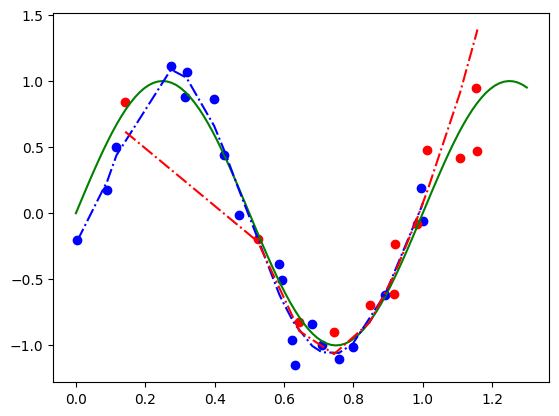

In [60]:
import matplotlib.pyplot as plt

plt.scatter(train_X, train_y, color="blue")
plt.scatter(test_X, test_y, color="red")

x = np.linspace(0, 1.3, 100)
plt.plot(x, np.sin(x * 2 * np.pi), "-", color="green")
plt.plot(train_X, train_pred_y_0, "-.", color="blue")
plt.plot(test_X, test_pred_y_0, "-.", color="red")

print("alpha=0.0:")
plt.show()

alpha=1.0:


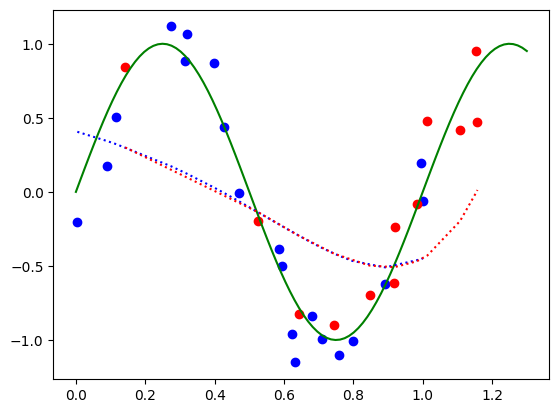

In [59]:
plt.scatter(train_X, train_y, color="blue")
plt.scatter(test_X, test_y, color="red")
plt.plot(x, np.sin(x * 2 * np.pi), "-", color="green")
plt.plot(train_X, train_pred_y_1, ":", color="blue")
plt.plot(test_X, test_pred_y_1, ":", color="red")
print("alpha=1.0:")
plt.show()